##**Домашнее задание по теме "Поиск выбросов и генерация новых признаков"**

**Цель:**
Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

**Описание задания:**
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

2. Проведите первичный анализ.
   а) Проверьте количество записей для каждого класса и сделайте вывод.
   
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве

5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

6. Обработайте выбросы в данных.

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

7. Повторите п. 4, п. 5.

8. Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.


**Решение:**

### Этап 1: Получение данных и загрузка в рабочую среду

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("glass.csv")

print(df.head())
print(df.info())
print(df.describe().T)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
     

**Атрибуты:**
1. **RI** (показатель преломления) - числовой признак, который является непрерывным значением.
2. **Na** (натрий) - числовой признак, представленный весовым процентом в соответствующем оксиде.
3. **Mg** (магний) - числовой признак, также в весовом проценте.
4. **Al** (алюминий) - числовой признак, представленный весовым процентом.
5. **Si** (кремний) - числовой признак, представленный весовым процентом.
6. **K** (калий) - числовой признак, процент содержания калия.
7. **Ca** (кальций) - числовой признак, процент содержания кальция.
8. **Ba** (барий) - числовой признак, процент содержания бария.
9. **Fe** (железо) - числовой признак, процент содержания железа.

**Целевая переменная:**
10. **Type** (тип стекла) - категориальный признак, определяющий тип стекла. У него 7 уникальных значений:


1. **building_windows_float_processed** - стекло для строительных окон с обработкой плавления.
2. **building_windows_non_float_processed** - стекло для строительных окон без обработки плавления.
3. **vehicle_windows_float_processed** - стекло для автомобильных окон с обработкой плавления.
4. **vehicle_windows_non_float_processed** - стекло для автомобильных окон без обработки плавления. Данного типа в этой базе данных нет соголасно описания к датасету.
5. **containers** - стекло для контейнеров, тары.
6. **tableware** - стекло для посуды.
7. **headlamps** - стекло для фар.

Анализируя статистики, можно сделать следующие выводы:
- Для атрибутов RI, Na, Mg, Al, Si значения среднего и медианы близки друг к другу, что показывает отсутствие существенных выбросов.
- Для атрибутов с более высоким стандартным отклонением (например, Ca), можно дополнительно оценить данные на предмет выбросов.
- В целом, распределение данных по атрибутам весьма стабильное, и отклонения от среднего значения не являются значительными.

### Этап 2: Проведение первичного анализа

In [ ]:
data = df

In [ ]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


- 2.а) Проверим количество записей для каждого класса

In [ ]:
class_counts = data['Type'].value_counts()

print(class_counts)

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


В каждом классе количество записей разное и значимо отличается, что можно привести к снижению эффективности модели машинного обучения.


Используем `RandomUnderSampler` для уменьшения представленных классов в наших данных:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Определение признаков и целевой переменной
X = data.drop('Type', axis=1)
y = data['Type']

# Создание объекта RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Применение RandomUnderSampler к данным
X_resampled, y_resampled = rus.fit_resample(X, y)

# Проверка количества записей после undersampling
print(pd.Series(y_resampled).value_counts())

Type
1    9
2    9
3    9
5    9
6    9
7    9
Name: count, dtype: int64


In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(54, 9)
(54,)


### Этап 3: Разделение выборки на обучающее и тестовое подмножество

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разделение на обучающее и тестовое подмножество до undersampling
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Разделение на обучающее и тестовое подмножество после undersampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Этап 4: Обучение модели дерева решений RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Создание и обучение модели RandomForestClassifier на данных до undersampling
clf_before = RandomForestClassifier(random_state=42)
clf_before.fit(X_train_before, y_train_before)

RandomForestClassifier(random_state=42)

In [ ]:
# Создание и обучение модели RandomForestClassifier после undersampling
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Этап 5: Оценка точности модели

In [ ]:
# Оценка точности модели на обучающем наборе до undersampling
train_accuracy_before = clf_before.score(X_train_before, y_train_before)

# Оценка точности модели на тестовом наборе до undersampling
test_accuracy_before = clf_before.score(X_test_before, y_test_before)

# Оценка точности модели на обучающем наборе после undersampling
train_accuracy_after = clf.score(X_train, y_train)

# Оценка точности модели на тестовом наборе после undersampling
test_accuracy_after = clf.score(X_test, y_test)

# Создаем пустую таблицу для метрик
metrics_table = pd.DataFrame(columns=['Модель', 'Точность на обучающем наборе', 'Точность на тестовом наборе'])

# Добавляем метрики для модели до undersampling
metrics_table.loc[0] = ['Модель до undersampling', train_accuracy_before, test_accuracy_before]

# Добавляем метрики для модели после undersampling
metrics_table.loc[1] = ['Модель после undersampling', train_accuracy_after, test_accuracy_after]

# Выводим таблицу на печать
metrics_table

,Модель,Точность на обучающем наборе,Точность на тестовом наборе
0,Модель до undersampling,1.0,0.837209
1,Модель после undersampling,1.0,0.727273


Из полученных результатов точности до и после undersampling видно следующее:

1. До и после undersampling  наблюдается переобучение.
2. После переобучения точность на тестовой выборке упала, что связано с потерей информации и ведет к ухудшению обобщающей функции модели.








### Этап 6: Обработка выбросов в данных

####  6. а) Визуализация распределения значений для каждой переменной

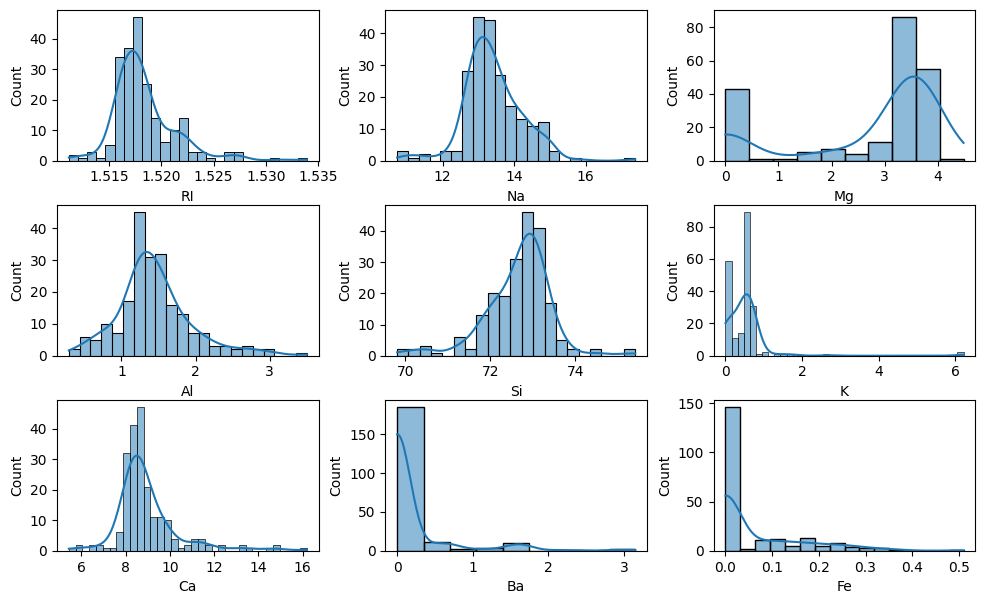

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
fig.tight_layout()

for col, n in zip(X, range(1, len(X)+1)):
    plt.subplot(3, 3, n)
    sns.histplot(X[col], kde=True)

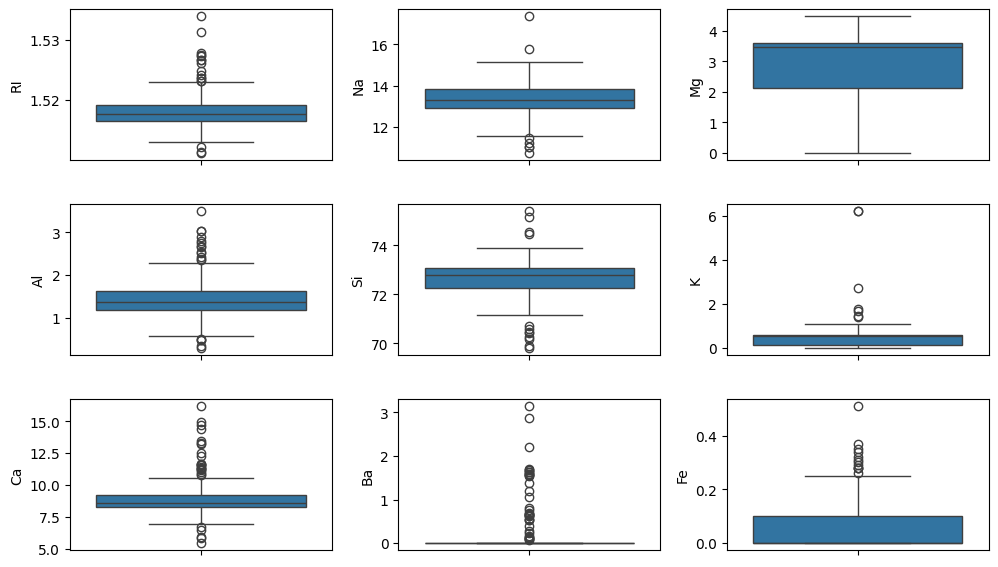

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
fig.tight_layout()

for col, n in zip(X, range(1, len(X)+1)):
    plt.subplot(3, 3, n)
    sns.boxplot(X[col])

#### 6. b) Исследование признаков на наличие выбросов несколькими способами.


  #### 6. с) Удаление выбросов из данных и подсчет процента удаленных записей от общего числа записей для каждого класса.

Один из способов удаления выбросов это создание справочника с допустимыми значениями элементов в стекле.

Воспользуемся следующим источником:
- ISO 16293-1: Glass in building -- Basic soda-lime-silicate glass products - стандарт, который описывает химический состав и свойства строительного стекла.


In [ ]:
# Общий справочник диапазонов
combined_reference_ranges = {
    'RI': (1.50, 1.56),
    'Na': (10, 16),
    'Mg': (0.5, 4.5),
    'Al': (0.5, 3),
    'Si': (70, 75),
    'K': (0, 1),
    'Ca': (5, 12),
    'Ba': (0, 0.3),
    'Fe': (0, 0.3)
}

# Сохранение количества записей для каждого класса до удаления выбросов
initial_counts = data['Type'].value_counts()

# Функция для удаления строк с выбросами на основе общего справочника
def remove_outliers(data, combined_reference_ranges):
    for column, (min_val, max_val) in combined_reference_ranges.items():
        data = data[(data[column] >= min_val) & (data[column] <= max_val)]
    return data

# Удаление выбросов
cleaned_data = remove_outliers(data, combined_reference_ranges)

# Сохранение количества записей для каждого класса после удаления выбросов
final_counts = cleaned_data['Type'].value_counts()

# Подсчет процента удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")

Процент удаленных записей для каждого класса:
Класс 2: 15.79%
Класс 1: 7.14%
Класс 7: 93.10%
Класс 3: 5.88%
Класс 5: 76.92%
Класс 6: 33.33%


In [ ]:
# Функция для удаления выбросов с использованием метода межквартильного размаха (IQR)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
    cleaned_data = data[~outliers]
    return cleaned_data

# Создаем копию исходных данных для очистки
cleaned_data_iqr = data.copy()

# Удаление выбросов с использованием метода межквартильного размаха (IQR)
cleaned_data_iqr = remove_outliers_iqr(cleaned_data_iqr)

# Получение количества записей для каждого класса после удаления выбросов
final_counts_iqr = cleaned_data_iqr['Type'].value_counts()

# Подсчет процента удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts_iqr.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")


Процент удаленных записей для каждого класса:
Класс 2: 27.63%
Класс 1: 15.71%
Класс 7: 100.00%
Класс 3: 11.76%
Класс 5: 84.62%
Класс 6: 44.44%


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Функция для обнаружения выбросов с использованием метода kNN
def detect_outliers_knn(X, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    k_distances = distances[:,-1]
    threshold = np.percentile(k_distances, 95)  # Определяем порог для выявления выбросов
    outliers = (k_distances > threshold).astype(int)  # Маркируем выбросы
    return outliers

# Функция для удаления выбросов с использованием метода kNN
def remove_outliers_knn(data, k=5):
    X = data.drop(columns=['Type']).values
    outliers = detect_outliers_knn(X, k)
    cleaned_data = data[outliers == 0]  # Оставляем только нормальные точки
    return cleaned_data

# Создаем копию исходных данных для очистки
cleaned_data_knn = data.copy()

# Удаление выбросов с использованием метода kNN (в данном случае k=5)
cleaned_data_knn = remove_outliers_knn(cleaned_data_knn, k=5)

# Создаем очищенный DataFrame
final_counts_knn = cleaned_data_knn['Type'].value_counts()

# Подсчитываем процент удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts_knn.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")

Процент удаленных записей для каждого класса:
Класс 2: 5.26%
Класс 1: 0.00%
Класс 7: 10.34%
Класс 3: 0.00%
Класс 5: 23.08%
Класс 6: 11.11%


In [ ]:
from sklearn.svm import OneClassSVM

# Функция для обнаружения выбросов с использованием One-Class SVM
def detect_outliers_oneclasssvm(data, nu=0.1):
    model = OneClassSVM(kernel='rbf', nu=nu)
    X = data.drop(columns=['Type']).values
    model.fit(X)
    outliers = model.predict(X)
    return outliers

# Функция для удаления выбросов с помощью One-Class SVM
def remove_outliers_oneclasssvm(data, nu=0.1):
    outliers = detect_outliers_oneclasssvm(data, nu)
    cleaned_data = data[outliers == 1]  # Оставляем только "нормальные" точки
    return cleaned_data

# Создаем копию исходных данных для очистки
cleaned_data_oneclasssvm = data.copy()

# Удаление выбросов с использованием метода One-Class SVM
cleaned_data_oneclasssvm = remove_outliers_oneclasssvm(cleaned_data_oneclasssvm, nu=0.1)

# Получение количества записей для каждого класса после удаления выбросов
final_counts_oneclasssvm = cleaned_data_oneclasssvm['Type'].value_counts()

# Подсчет процента удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts_oneclasssvm.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")

Процент удаленных записей для каждого класса:
Класс 2: 13.16%
Класс 1: 2.86%
Класс 7: 17.24%
Класс 3: 0.00%
Класс 5: 30.77%
Класс 6: 22.22%


### Этап 7: Повторное обучение модели и оценка точности после обработки выбросов

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Создание переменных с признаками и целевой переменной для каждого метода очистки данных

# Для cleaned_data
X_cleaned_data = cleaned_data.drop('Type', axis=1)
y_cleaned_data = cleaned_data['Type']

# Разделение данных cleaned_data на обучающий и тестовый наборы
X_train_cleaned_data, X_test_cleaned_data, y_train_cleaned_data, y_test_cleaned_data = train_test_split(X_cleaned_data, y_cleaned_data, test_size=0.2, random_state=42)

# Создание и обучение модели RandomForestClassifier на очищенных данных cleaned_data
clf_cleaned_data = RandomForestClassifier(random_state=42)
clf_cleaned_data.fit(X_train_cleaned_data, y_train_cleaned_data)

# Оценка точности модели на обучающем наборе очищенных данных cleaned_data
train_accuracy_cleaned_data = clf_cleaned_data.score(X_train_cleaned_data, y_train_cleaned_data)

# Оценка точности модели на тестовом наборе очищенных данных cleaned_data
test_accuracy_cleaned_data = clf_cleaned_data.score(X_test_cleaned_data, y_test_cleaned_data)

# Добавляем метрики для модели на очищенных данных cleaned_data в таблицу
metrics_table.loc[2] = ['Модель на очищенных данных cleaned_data', train_accuracy_cleaned_data, test_accuracy_cleaned_data]

# Для cleaned_data_knn
X_cleaned_data_knn = cleaned_data_knn.drop('Type', axis=1)
y_cleaned_data_knn = cleaned_data_knn['Type']
X_train_cleaned_data_knn, X_test_cleaned_data_knn, y_train_cleaned_data_knn, y_test_cleaned_data_knn = train_test_split(X_cleaned_data_knn, y_cleaned_data_knn, test_size=0.2, random_state=42)
clf_cleaned_data_knn = RandomForestClassifier(random_state=42)
clf_cleaned_data_knn.fit(X_train_cleaned_data_knn, y_train_cleaned_data_knn)
train_accuracy_cleaned_data_knn = clf_cleaned_data_knn.score(X_train_cleaned_data_knn, y_train_cleaned_data_knn)
test_accuracy_cleaned_data_knn = clf_cleaned_data_knn.score(X_test_cleaned_data_knn, y_test_cleaned_data_knn)
metrics_table.loc[3] = ['Модель на очищенных данных cleaned_data_knn', train_accuracy_cleaned_data_knn, test_accuracy_cleaned_data_knn]

# Для cleaned_data_oneclasssvm
X_cleaned_data_oneclasssvm = cleaned_data_oneclasssvm.drop('Type', axis=1)
y_cleaned_data_oneclasssvm = cleaned_data_oneclasssvm['Type']
X_train_cleaned_data_oneclasssvm, X_test_cleaned_data_oneclasssvm, y_train_cleaned_data_oneclasssvm, y_test_cleaned_data_oneclasssvm = train_test_split(X_cleaned_data_oneclasssvm, y_cleaned_data_oneclasssvm, test_size=0.2, random_state=42)
clf_cleaned_data_oneclasssvm = RandomForestClassifier(random_state=42)
clf_cleaned_data_oneclasssvm.fit(X_train_cleaned_data_oneclasssvm, y_train_cleaned_data_oneclasssvm)
train_accuracy_cleaned_data_oneclasssvm = clf_cleaned_data_oneclasssvm.score(X_train_cleaned_data_oneclasssvm, y_train_cleaned_data_oneclasssvm)
test_accuracy_cleaned_data_oneclasssvm = clf_cleaned_data_oneclasssvm.score(X_test_cleaned_data_oneclasssvm, y_test_cleaned_data_oneclasssvm)
metrics_table.loc[4] = ['Модель на очищенных данных cleaned_data_oneclasssvm', train_accuracy_cleaned_data_oneclasssvm, test_accuracy_cleaned_data_oneclasssvm]


# Для cleaned_data_iqr
X_cleaned_data_iqr = cleaned_data_iqr.drop('Type', axis=1)
y_cleaned_data_iqr = cleaned_data_iqr['Type']
X_train_cleaned_data_iqr, X_test_cleaned_data_iqr, y_train_cleaned_data_iqr, y_test_cleaned_data_iqr = train_test_split(X_cleaned_data_iqr, y_cleaned_data_iqr, test_size=0.2, random_state=42)
clf_cleaned_data_iqr = RandomForestClassifier(random_state=42)
clf_cleaned_data_iqr.fit(X_train_cleaned_data_iqr, y_train_cleaned_data_iqr)
train_accuracy_cleaned_data_iqr = clf_cleaned_data_iqr.score(X_train_cleaned_data_iqr, y_train_cleaned_data_iqr)
test_accuracy_cleaned_data_iqr = clf_cleaned_data_iqr.score(X_test_cleaned_data_iqr, y_test_cleaned_data_iqr)
metrics_table.loc[5] = ['Модель на очищенных данных cleaned_data_iqr', train_accuracy_cleaned_data_iqr, test_accuracy_cleaned_data_iqr]

# В конце выведем обновленную таблицу метрик
metrics_table.sort_values(by='Точность на тестовом наборе', ascending=False)


,Модель,Точность на обучающем наборе,Точность на тестовом наборе
0,Модель до undersampling,1.0,0.837209
3,Модель на очищенных данных cleaned_data_knn,1.0,0.804878
2,Модель на очищенных данных cleaned_data,1.0,0.781250
5,Модель на очищенных данных cleaned_data_iqr,1.0,0.750000
1,Модель после undersampling,1.0,0.727273
4,Модель на очищенных данных cleaned_data_onecla...,1.0,0.692308


### Этап 8: Сформулировать выводы по проделанной работе

#### - 8.1 Преобразования, проведенные с данными.

1. Undersampling представленных классов с использованием RandomUnderSampler.
2. Выявление и удаление выбросов различными способами:
     - За счет разработки справочника допустимых значений для каждого элемента.
     - Метод межквартильного размаха (IQR).
     - Метод k-ближайших соседей (kNN).
     - Метод One-Class SVM.
3. Обучение моделей RandomForestClassifier:
   - Обучение модели RandomForestClassifier на исходных и обработанных данных.

#### - 8.2 Сравните точность моделей: до и после обработки выбросов

- Модель до undersampling на исходных данных показала наилучшую точность на тестовом наборе (83.72%) по сравнению со всеми другими методами. Вероятно удаление данных привело к потере ценной для модели информации.
- Среди использованных моделей наибольшую точность показала Модель на данных после удаления выбросов методом kNN: точность 80.49%, а наименьшую - Модель на данных после One-Class SVM: точность 69.23%.
При этом во всех моделях на обучающем наборе наблюдалось переобучение.
Возможно при использовании других методов, например, oversampling результаты были бы выше.

#### - 8.3 Мнение о необходимости исследования данных на выбросы, плюсы и минусы

Исследовать данные на выбросы непременно нужно. Сильные выбросы искажают данные. Однако всегда неоходимо ориентироваться анализируемые данные при выборе способа удаления выбросов и оценке, действительно ли это выбросы. В некоторых ситуациях придется определять оптимальный способ опытным путем.